# Introduction to Computer Vision: Plant Seedlings Classification
</br>
Presented by: Rolando López

##1. Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### Problem statement definition

Problem: Manual identification of plant seedlings is time-consuming and inefficient, hindering agricultural productivity.

Solution: Build a CNN model to automate plant seedling classification into 12 species using image data.

Impact: This automation will improve efficiency, crop yields, and sustainability in agriculture.

Data: The model will be trained using a dataset containing images and labels for 12 plant species.

Goal: Achieve high accuracy in identifying plant species from images using the CNN model.

Overall: The project aims to modernize agriculture by leveraging AI to automate a critical task, benefiting the industry and its workforce.

## 2. Env prep

### 2.1. Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
import os
import numpy as np # for Matrix Operations
import pandas as pd # to read CSV files
import matplotlib.pyplot as plt # for Plotting and visualizing images
import math # Importing math module to perform mathematical operations
import cv2 # Importing openCV for image processing
import seaborn as sns # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam, SGD # Importing the optimizers which can be used in our model

from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import preprocessing # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, f1_score # Importing confusion_matrix to plot the confusion matrix
from sklearn.metrics import classification_report # Importing classification_report to plot the classification report
from sklearn.preprocessing import LabelBinarizer # Display images using OpenCV
from google.colab.patches import cv2_imshow # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight # to handle class imbalances


import random
import time
from IPython.display import Markdown, display


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# printing the versions installed at the date of this notebook, in case it's needed for future use
!pip list | grep tensorflow
!pip list | grep scikit-learn
!pip list | grep seaborn
!pip list | grep matplotlib
!pip list | grep numpy
!pip list | grep pandas

tensorflow                         2.18.0
tensorflow-datasets                4.9.8
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.16.1
tensorflow-probability             0.25.0
tensorflow-text                    2.18.1
scikit-learn                       1.6.1
seaborn                            0.13.2
matplotlib                         3.10.0
matplotlib-inline                  0.1.7
matplotlib-venn                    1.1.2
numpy                              2.0.2
geopandas                          1.0.1
pandas                             2.2.2
pandas-datareader                  0.10.0
pandas-gbq                         0.28.0
pandas-stubs                       2.2.2.240909
sklearn-pandas                     2.2.0


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

### 2.2. Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image dataset
images = np.load('/content/drive/MyDrive/Education/DBA AI/M05 Computer Vision/project 05_computer vision/images.npy')

# Load the labels dataset
labels = pd.read_csv('/content/drive/MyDrive/Education/DBA AI/M05 Computer Vision/project 05_computer vision/labels.csv')

### 2.3. Globals

In [6]:
# variables to be used across the notebook
gbl_random_seed = 42
gbl_epochs = 50
gbl_batch_size = 32
gbl_verbose = 1
gbl_shuffle = True
gbl_learning_rate = 0.0001


# Create the DataFrame outside the function
df_model_results = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1'])

## 3. Data Overview

### Understand the shape of the dataset

In [7]:
print(f"The shape of the images array is: {images.shape}")
print(f"The shape of the labels array is: {labels.shape}")
print(f"The number of images in the dataset is: {images.shape[0]}")
print(f"The number of unique labels in the dataset is: {len(np.unique(labels))}")

The shape of the images array is: (4750, 128, 128, 3)
The shape of the labels array is: (4750, 1)
The number of images in the dataset is: 4750
The number of unique labels in the dataset is: 12


There are 4750 images, size 128x128 pixels, 3 color channels.

## 4. Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check using bar plots)

In [8]:
def plot_random_images_per_class(images, labels):
  """Plots 1 random image from each class in a grid.

  Args:
    images: A NumPy array of images.
    labels: A Pandas DataFrame of labels.
  """

  # getting the unique labels
  unique_labels = labels['Label'].unique()
  num_classes = len(unique_labels)
  cols = 4
  rows = math.ceil(num_classes / cols)
  fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

  for i, label in enumerate(unique_labels):
    # Get indices of images belonging to the current label
    label_indices = labels[labels['Label'] == label].index.tolist()
    # Choose a random index from the current label indices
    random_index = np.random.choice(label_indices)
    # Get the image and label
    image = images[random_index]
    # Calculate the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image
    axes[row, col].imshow(image)
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

  # Remove any empty subplots
  for i in range(num_classes, rows * cols):
    row = i // cols
    col = i % cols
    fig.delaxes(axes[row, col])

  plt.tight_layout()
  plt.show()

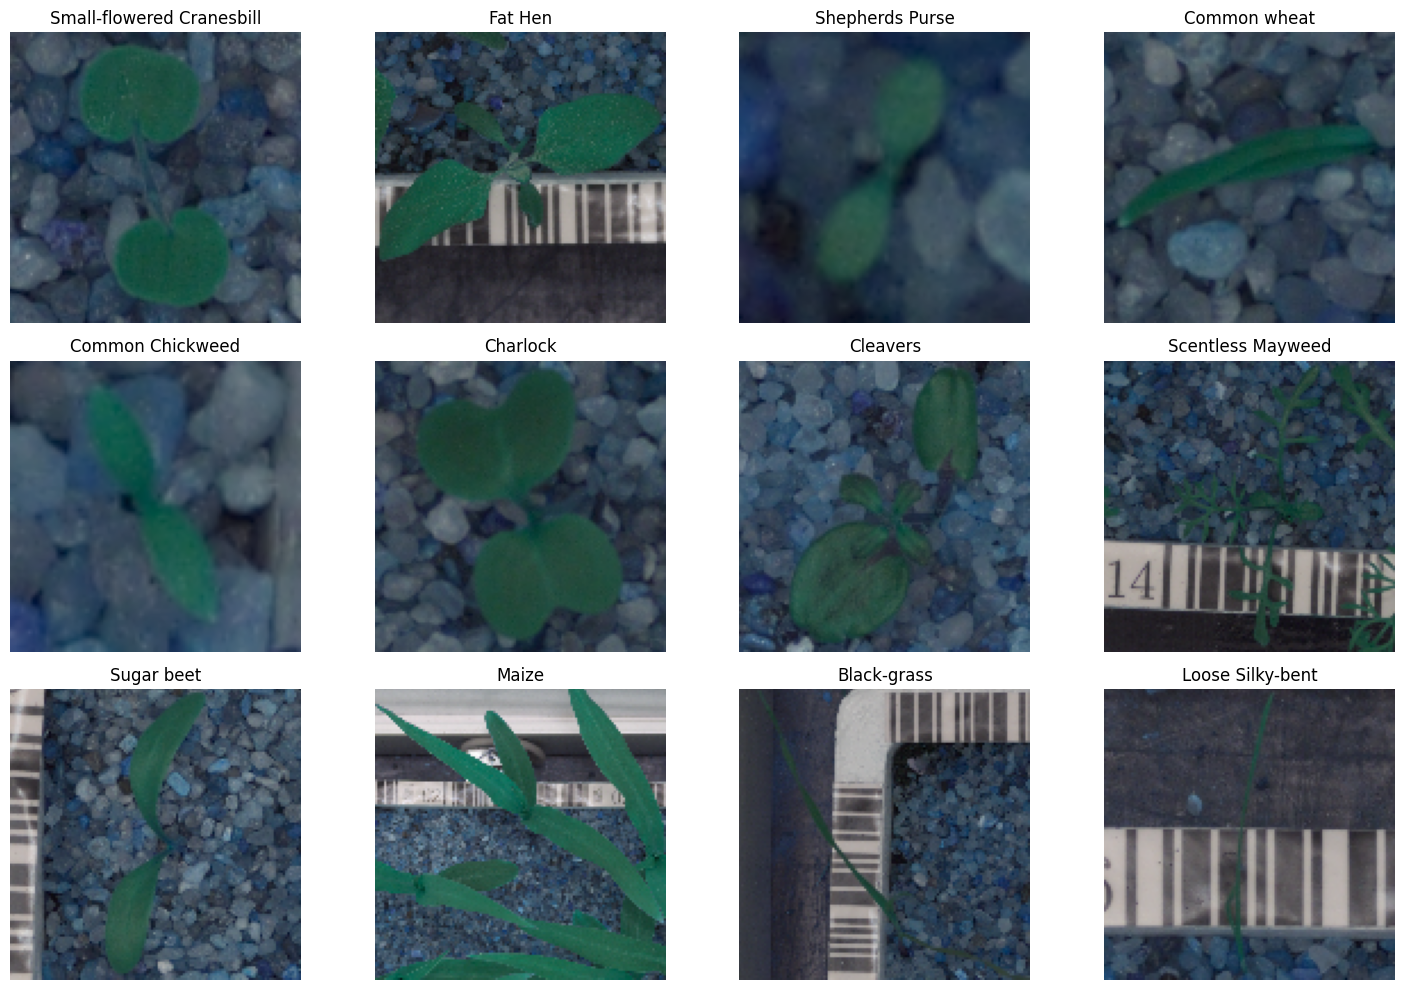

In [9]:
# Call the function to plot the images
plot_random_images_per_class(images, labels)

### 4.1. How are these different category plant images different from each other?

**Key Characteristics that differentiate each class**

**1. Small-flowered Cranesbill**  
- Round, lobed leaves with slight serrations.  
- Compact growth with multiple stems emerging from a central point.  

**2. Fat Hen**  
- Smooth, lance-shaped leaves with a slightly waxy appearance.  
- Leaves grow in an opposite arrangement, often slightly curved.  

**3. Shepherd’s Purse**  
- Small, heart-shaped leaves.  
- Low-growing with a rosette formation.  

**4. Common Wheat**  
- Long, narrow leaves with parallel venation.  
- Upright growth with leaves emerging in an alternating pattern.  

**5. Common Chickweed**  
- Oval-shaped leaves with a pointed tip.  
- Small stems that are thin and often creeping.  

**6. Charlock**  
- Large, rounded leaves with deep lobes.  
- Slightly rough or hairy texture on the leaves.  

**7. Cleavers**  
- Long, narrow leaves arranged in a whorled pattern.  
- Sticky or rough texture due to tiny hooked hairs.  

**8. Scentless Mayweed**  
- Thin, feathery leaves with multiple lobes.  
- Often found in a dense, spreading growth pattern.  

**9. Sugar Beet**  
- Large, broad leaves with a smooth texture.  
- Prominent veins and a thick central stem.  

**10. Maize**  
- Broad, curved cotyledons.
- Thick, smooth leaves with parallel venation.
- Cylindrical growth pattern.  

**11. Black-grass**
- Narrow, grass-like leaves with a fine texture.
- Parallel venation.
- Slender, upright growth.

**12. Loose Silky-bent**
- Extremely thin, thread-like leaves.
- Weak stems that tend to bend and sprawl.
- Grass-like appearance with a fine texture.

### 4.2. Checking the distribution of the target variable

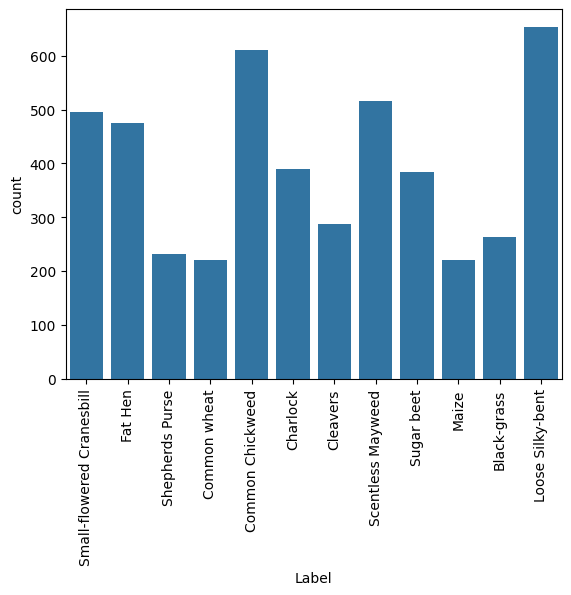

In [10]:
# plotting the distribution of the labels
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical');

**Insights from Sample Distribution**

- The dataset shows uneven class distribution, meaning some classes have significantly more samples than others.
- Most frequent classes:  
  - Loose Silky-bent (~650 samples)
  - Common Chickweed (~610 samples)
  - Scentless Mayweed (~520 samples)
  - Small-flowered Cranesbill & Fat Hen (~480-500 samples)  
- Least frequent classes:  
  - Shepherd's Purse & Common Wheat (~220-230 samples)
  - Maize & Black-grass (~210-230 samples)  
- Mid-range classes:  
  - Charlock, Sugar Beet, Cleavers (~300-400 samples)  

Potential Issues
- Imbalanced Classes: The model might favor frequent classes, leading to lower recall for underrepresented ones.
- Overfitting Risks: The model may memorize majority class features, reducing generalization to unseen data.

Possible Solutions
- Adjust class weights in loss computation.    
- Prioritize F1-score, recall, and balanced accuracy over plain accuracy.  


## 5. Data Pre-Processing

### 5.1. Convert the BGR images to RGB images.

In [11]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### 5.2. Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [12]:
# experimenting with keeping the images with their original size. Only model_aug improved performance, but did not surpassed model_1 with downsized images, therefore, reverting back to 64x64
# images_decreased = images.copy()

# resizing the images from 128x128 to 64x64
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

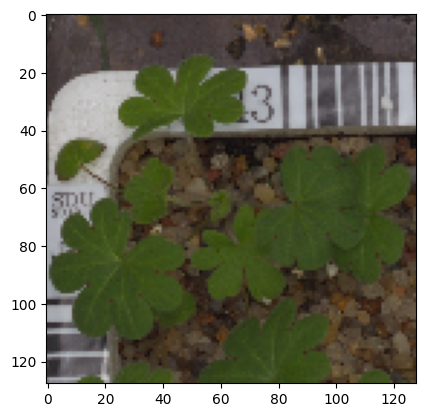

In [13]:
# plotting image at index 4
plt.imshow(images[3]);

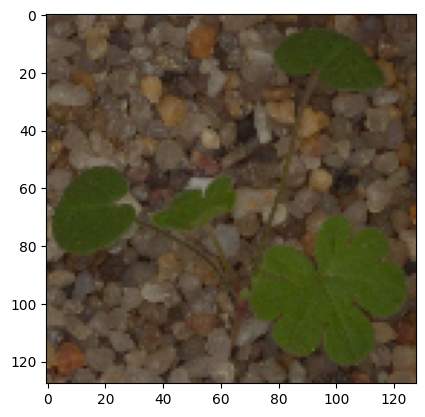

In [14]:
# plotting image at index 31
plt.imshow(images[30]);

**Image after resizing**

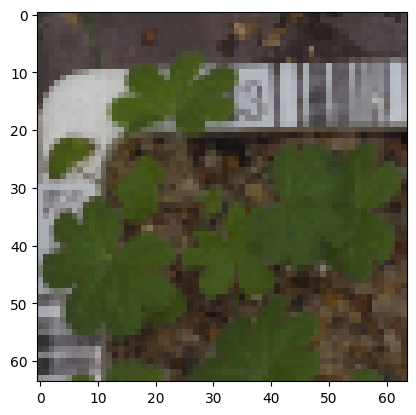

In [15]:
# plotting image at index 4, after resizing
plt.imshow(images_decreased[3]);

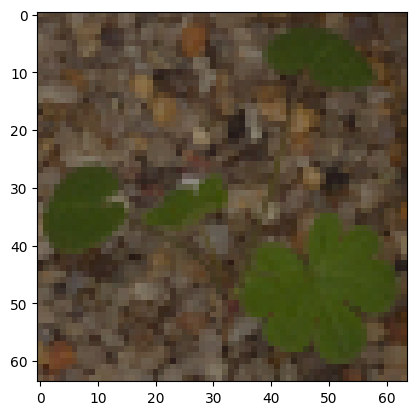

In [16]:
# plotting image at index 31, after resizing
plt.imshow(images_decreased[30]);

### 5.3. Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [17]:
# Splitting data into training, validation and test set: 80/10/10
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased), labels, test_size=0.2, random_state=gbl_random_seed, stratify=labels, shuffle=gbl_shuffle)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=gbl_random_seed, stratify=y_temp, shuffle=gbl_shuffle)

In [18]:
print("Shape of the train set", X_train.shape, "labels shape", y_train.shape)
print("Shape of the validation set", X_val.shape, "labels shape", y_val.shape)
print("Shape of the test set", X_test.shape, "labels shape", y_test.shape)

Shape of the train set (3800, 64, 64, 3) labels shape (3800, 1)
Shape of the validation set (475, 64, 64, 3) labels shape (475, 1)
Shape of the test set (475, 64, 64, 3) labels shape (475, 1)


### 5.4. Encode the target labels

In [19]:
# encoding the target labels, applying fit_transform only on the training set
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [20]:
print("Shape of the train set", y_train_encoded.shape)
print("Shape of the val set", y_val_encoded.shape)
print("Shape of the test set", y_test_encoded.shape)

Shape of the train set (3800, 12)
Shape of the val set (475, 12)
Shape of the test set (475, 12)


### 5.5. Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [21]:
# normalizing the train, val, test sets
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## 6. Model Building

### 6.0. functions

In [22]:
def clear_and_reseed():

  # Clearing backend
  backend.clear_session()

  # Sets all random seeds (Python, NumPy, and backend framework, e.g. TF).
  tf.keras.utils.set_random_seed(gbl_random_seed)


In [23]:
def cnn_plots(model_name, model, history, X_test = X_test_normalized, y_test = y_test_encoded):
  """
  displays and prints several reports and plots for the provided parameters.
  NOTE:

  Args:
    model_name: name for the model
    model: nn model
    history: history data for the model
    X_train: training data features
    y_train: training data labels

  """

  display(Markdown("**Model Evaluation**"))

  # Plot Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot Recall
  plt.plot(history.history['recall'])
  plt.plot(history.history['val_recall'])
  plt.title('Model Recall')
  plt.ylabel('Recall')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot Precision
  plt.plot(history.history['precision'])
  plt.plot(history.history['val_precision'])
  plt.title('Model Precision')
  plt.ylabel('Precision')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # evaluate the model on test data
  loss, accuracy, recall, precision = model.evaluate(X_test, y_test, verbose=gbl_verbose)

  # calculating f1-score
  f1 = 2 * (precision * recall) / (precision + recall)


  # Plot f1-score
  plt.plot(history.history['val_precision'])
  plt.plot(history.history['val_recall'])
  plt.plot([ (2 * p * r) / (p + r) if (p + r) != 0.0 else 0.0 for (p, r) in zip(history.history['val_precision'], history.history['val_recall']) ])
  plt.title('Model F1-score')
  plt.ylabel('F1-score')
  plt.xlabel('Epoch')
  plt.legend(['Precision', 'Recall', 'F1-Score'], loc='upper left')
  plt.show()


  display(Markdown("**---**"))
  display(Markdown("**Plotting the Confusion Matrix**"))

  # Here we would get the output as probablities for each category
  y_pred = model.predict(X_test)

  # Obtaining the categorical values from y_test_encoded and y_pred
  y_pred_arg = np.argmax(y_pred, axis=1)
  y_test_arg = np.argmax(y_test, axis=1)


  # Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
  confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

  f, ax = plt.subplots(figsize=(12, 12))
  sns.heatmap(
      confusion_matrix,
      annot=True,
      linewidths=.4,
      fmt="d",
      square=True,
      ax=ax,
      cmap=plt.cm.Blues
  )

  # Setting the labels to both the axes
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
  ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
  plt.show();


  display(Markdown("**Plotting the Confusion Matrix**"))

  # Plotting the classification report
  cr = classification_report(y_test_arg, y_pred_arg)
  print(cr)


  # Append the metrics to the dataframe
  # Check if the model_name already exists in the DataFrame
  if model_name in df_model_results['model_name'].values:
    # If it exists, update the existing row
    df_model_results.loc[df_model_results['model_name'] == model_name] = [model_name, accuracy, precision, recall, f1]
  else:
    # If it doesn't exist, append a new row
    df_model_results.loc[len(df_model_results)] = [model_name, accuracy, precision, recall, f1]

### 6.1. model1

**Callbacks** <br>
If the loss is not decreasing for some time (patience # of epochs), the following callbacks will be used:
*   Reducing the Learning Rate
*   Early Stopping

In [24]:
# Reducing Learning Rate if there's no improvement after (3) epochs
learning_rate_reduction1 = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=gbl_verbose,
                                            factor=0.5,
                                            min_lr=0.00001)


# EarlyStopping if there's no improvement after (5) epochs
early_stopping1 = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

In [25]:
# clear backend and random reseed
clear_and_reseed()

# Intializing a sequential model
model1 = Sequential()


# conv layer, with 256 kernels of 3x3 , padding 'same' provides the output size same as the input size
model1.add(Conv2D(256, (3, 3), padding='same', input_shape=X_train_normalized.shape[1:]))
model1.add(BatchNormalization()) # Batch norm before the activation layer
model1.add(tf.keras.layers.ReLU()) # activation layer
model1.add(MaxPooling2D((2, 2), padding='same')) # max pooling


# conv layer, with 128 kernels of 3x3 , padding 'same', relu activation
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same')) # max pooling

# conv layer, with 64 kernels of 3x3 , padding 'same', relu activation
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same')) # max pooling

# conv layer, with 32 kernels of 3x3 , padding 'same', relu activation
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same')) # max pooling


# experimenting with GlobalAveragePooling2D instead of Flatten
# model1.add(Flatten(input_shape=(64, 64)))
model1.add(GlobalAveragePooling2D())

# fully connected dense layers with 128, 64, (0.4 dropout), 32 neurons
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(32, activation='relu'))

# output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# using Adam as optimizer, setting the initial learning_rate
opt=Adam(learning_rate = gbl_learning_rate)

# compiling the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', 'recall','precision'])

# model summary
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,444 (1.57 MB)

 Trainable params: 409,932 (1.56 MB)

 Non-trainable params: 512 (2.00 KB)

### 6.2. Fitting the model on the training data

In [26]:
# tracking duration
start = time.time()

# fitting the model on training data, and validating with val set
history1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=gbl_epochs,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=gbl_batch_size,
            shuffle=gbl_shuffle,
            verbose=gbl_verbose,
            callbacks=[learning_rate_reduction1, early_stopping1]
)

# printing duration
end = time.time()
print(f"Time taken: {np.round(end - start,3)} seconds")

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.1002 - loss: 2.4746 - precision: 0.1500 - recall: 6.4747e-05 - val_accuracy: 0.2189 - val_loss: 2.4620 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.2179 - loss: 2.3065 - precision: 0.5931 - recall: 0.0174 - val_accuracy: 0.2589 - val_loss: 2.4177 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2866 - loss: 2.1223 - precision: 0.7025 - recall: 0.0706 - val_accuracy: 0.4505 - val_loss: 2.3049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3700 - loss: 1.9182 - precision: 0.6464 - recall: 0.1190 - val_accuracy: 0.4800 - val_loss: 1.9986 - val_precision: 1.0000 - val_recall: 0.0189 - learning_rate: 1.0000e-04
Epoch 5/50
119/

### 6.3. model1 plots

**Model Evaluation**

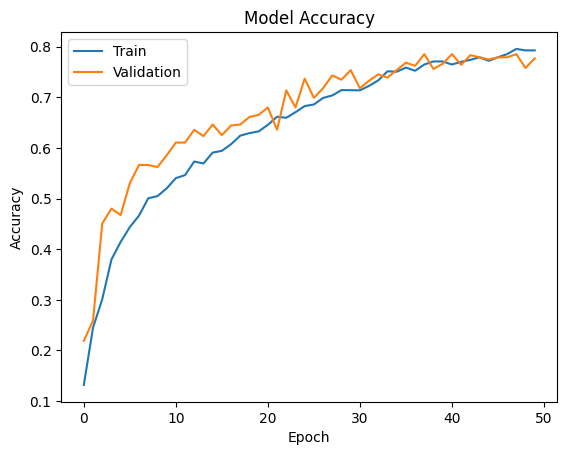

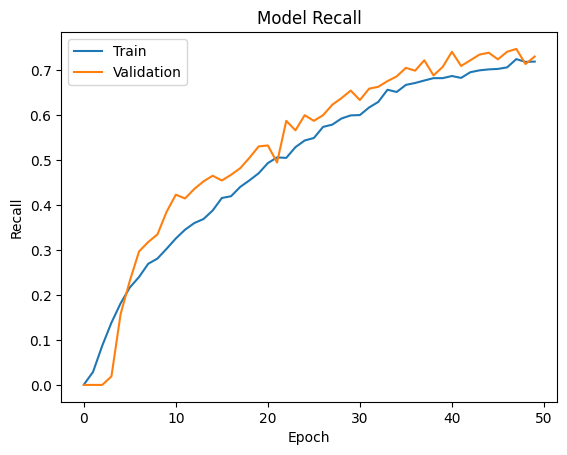

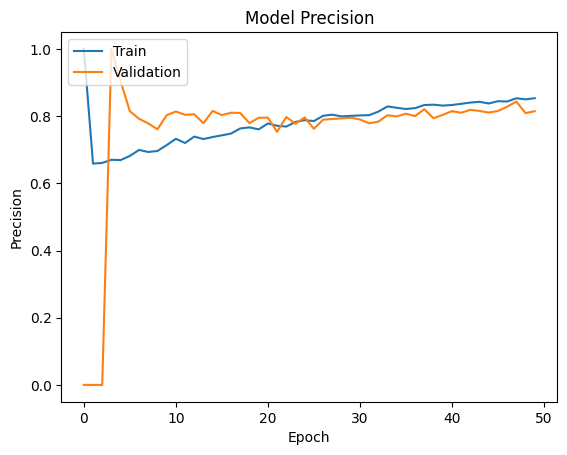

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8028 - loss: 0.6492 - precision: 0.8627 - recall: 0.7690


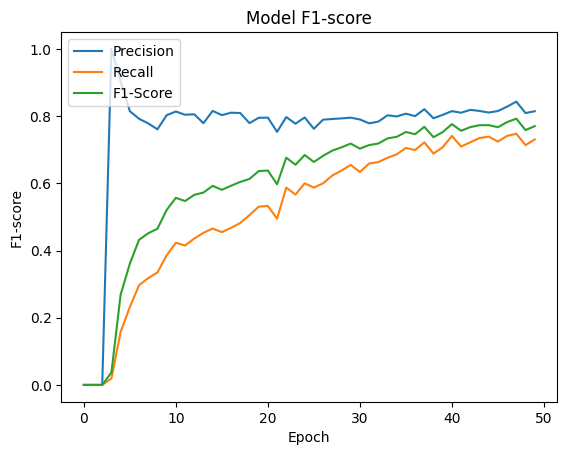

**---**

**Plotting the Confusion Matrix**

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step


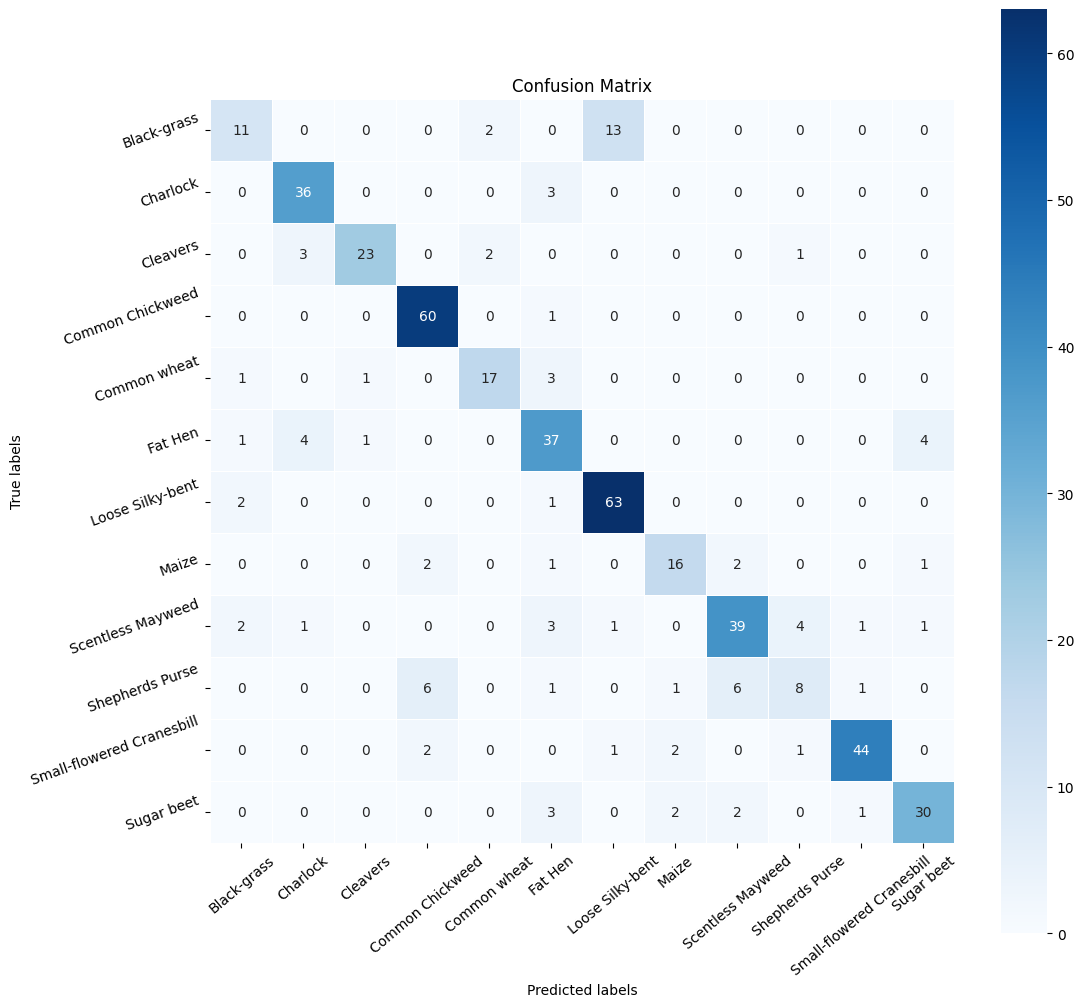

**Plotting the Confusion Matrix**

              precision    recall  f1-score   support

           0       0.65      0.42      0.51        26
           1       0.82      0.92      0.87        39
           2       0.92      0.79      0.85        29
           3       0.86      0.98      0.92        61
           4       0.81      0.77      0.79        22
           5       0.70      0.79      0.74        47
           6       0.81      0.95      0.88        66
           7       0.76      0.73      0.74        22
           8       0.80      0.75      0.77        52
           9       0.57      0.35      0.43        23
          10       0.94      0.88      0.91        50
          11       0.83      0.79      0.81        38

    accuracy                           0.81       475
   macro avg       0.79      0.76      0.77       475
weighted avg       0.80      0.81      0.80       475



In [27]:
cnn_plots('model1', model1, history1)

In [28]:
# displaying df with the metrics for the models built so far
df_model_results

,model_name,accuracy,precision,recall,f1
0,model1,0.808421,0.868235,0.776842,0.82


### 6.4. model1 analysis

`model1` shows steady improvement across all metrics, with validation-metrics closely following training-metrics, indicating minimal overfitting. Given the class imbalance, accuracy alone is not the best indicator of performance.

*   Precision is high, meaning when the model makes a prediction, it is usually correct. This is good, but with imbalanced data, it can be misleading since the model may prioritize majority classes.

*   Recall is lower, suggesting the model struggles to correctly classify all instances, especially for minority classes. This is a concern because lower recall means the model is missing actual instances of some classes.

*   F1-score balances precision and recall, making it a better metric for evaluation in this scenario.

The confusion matrix shows specific weaknesses, with some classes (e.g., Loose Silky-bent, Black-grass, scentless mayweed).


What we will focus on:

*   Prioritize recall and F1-score over accuracy to ensure better classification of minority classes.

*   Use class weighting to help the model pay more attention to underrepresented classes.

*   Fine-tune architecture (e.g., adding more convolutional layers, dropout, or adjusting learning rates) to improve generalization.

## 7. Model Performance Improvement

### 7.1. Callbacks <br>

If the loss is not decreasing for some time (patience # of epochs), the following callbacks will be used:
*   Reducing the Learning Rate
*   Early Stopping


In [29]:
# clear backend and reset random seed
clear_and_reseed()

In [30]:
# Reducing Learning Rate if there's no improvement after (3) epochs
learning_rate_reduction2 = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=gbl_verbose,
                                            factor=0.5,
                                            min_lr=0.00001)

# Early Stopping if there's no improvement after (5) epochs
early_stopping2 = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)


### 7.2. Data Augmentation

to be used only in the training set, and not in the  validation/test data set. Augmenting training set with rotations, shifts, zoom and flips

In [31]:
# augmenting training set with rotations, shifts, zoom and flips

train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

### 7.3. building model_aug

In [32]:

# Intializing a sequential model
model_aug = Sequential()


# conv layer, with 256 kernels of 3x3 , padding 'same' provides the output size same as the input size
model_aug.add(Conv2D(256, (3, 3), padding='same', input_shape=X_train_normalized.shape[1:]))
model_aug.add(BatchNormalization()) # Batch norm before the activation layer
model_aug.add(tf.keras.layers.ReLU()) # activation layer
model_aug.add(MaxPooling2D((2, 2), padding='same')) # max pooling

# conv layer, with 128 kernels of 3x3 , padding 'same', relu activation
model_aug.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_aug.add(MaxPooling2D((2, 2), padding='same'))

# conv layer, with 64 kernels of 3x3 , padding 'same', relu activation
model_aug.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_aug.add(MaxPooling2D((2, 2), padding='same'))

# conv layer, with 32 kernels of 3x3 , padding 'same', relu activation
model_aug.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_aug.add(MaxPooling2D((2, 2), padding='same'))

# experimenting with GlobalAveragePooling2D instead of Flatten
# model_aug.add(Flatten(input_shape=(64, 64)))
model_aug.add(GlobalAveragePooling2D())

# fully connected dense layers with 128, 64, (0.4 dropout), 32 neurons
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dense(64, activation='relu'))
model_aug.add(Dropout(0.4))
model_aug.add(Dense(32, activation='relu'))

# output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_aug.add(Dense(12, activation='softmax'))

# using Adam as optimizer, setting the initial learning_rate
opt=Adam(learning_rate = gbl_learning_rate)

# compiling the model using suitable metric for loss fucntion
model_aug.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', 'recall','precision'])

# model summary
model_aug.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,444 (1.57 MB)

 Trainable params: 409,932 (1.56 MB)

 Non-trainable params: 512 (2.00 KB)

### 7.4. Dealing with class imbalance with class weights

In [33]:
# creating a dictionary for balanced class weights

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train['Label']), y=y_train['Label'])

class_weights_dict = dict(enumerate(class_weights))

class_weights_dict

{0: np.float64(1.507936507936508),
 1: np.float64(1.014957264957265),
 2: np.float64(1.3828238719068413),
 3: np.float64(0.6475800954328562),
 4: np.float64(1.7890772128060264),
 5: np.float64(0.8333333333333334),
 6: np.float64(0.6054811982154238),
 7: np.float64(1.7890772128060264),
 8: np.float64(0.7667473769168685),
 9: np.float64(1.7117117117117118),
 10: np.float64(0.797649034424853),
 11: np.float64(1.0281385281385282)}

### 7.5. Fitting the model on the train data

In [34]:
# tracking duration
start = time.time()


# creating augmented training data using the ImageDataGenerator object
history_aug = model_aug.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                      batch_size = gbl_batch_size,
                                      shuffle = gbl_shuffle),
                                      epochs = gbl_epochs,
                                      steps_per_epoch = (X_train_normalized.shape[0] // gbl_batch_size),
                                      validation_data = (X_val_normalized,y_val_encoded),
                                      verbose = gbl_verbose,
                                      callbacks = [learning_rate_reduction2, early_stopping2],
                                      class_weight = class_weights_dict)

# printing duration
end = time.time()
print(f"Time taken: {np.round(end - start,3)} seconds")

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.0810 - loss: 2.4939 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1453 - val_loss: 2.4730 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.3058 - precision: 1.0000 - recall: 0.0312 - val_accuracy: 0.1389 - val_loss: 2.4728 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.1561 - loss: 2.3537 - precision: 0.1631 - recall: 0.0018 - val_accuracy: 0.1326 - val_loss: 2.4336 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1875 - loss: 2.2415 - precision: 1.0000 - recall: 0.0312 - val_accuracy: 0.1242 - val_loss: 2.4327 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoc

### 7.6. model_aug plots


**Model Evaluation**

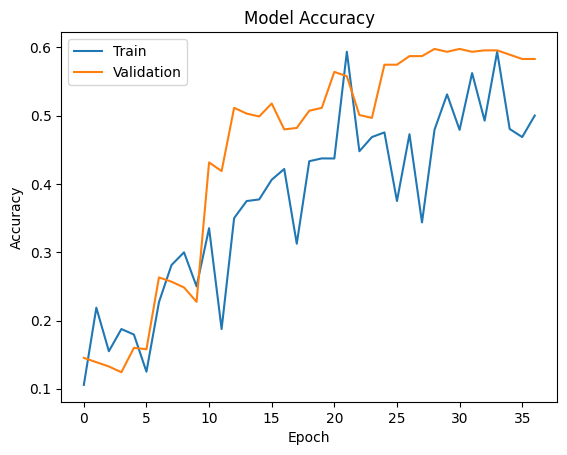

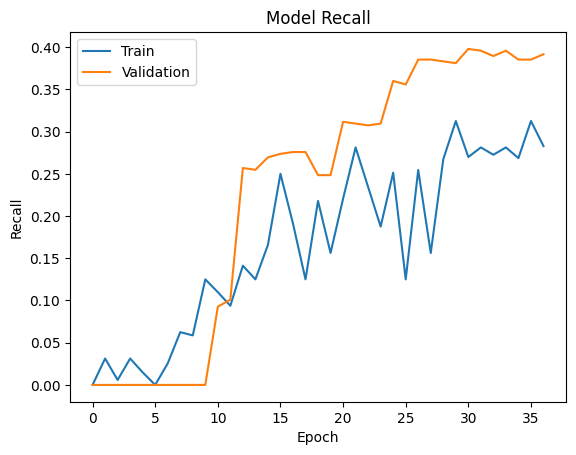

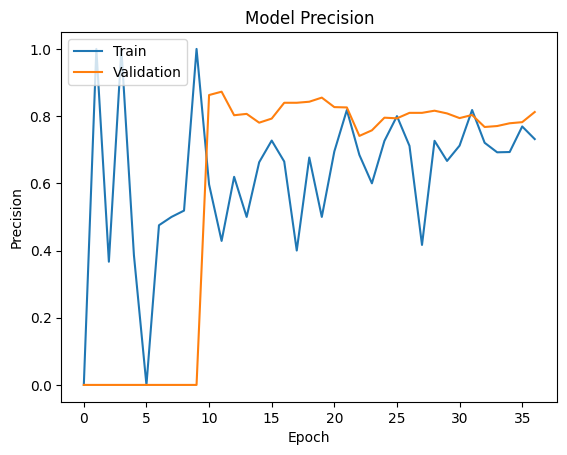

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5736 - loss: 1.1850 - precision: 0.8103 - recall: 0.3943


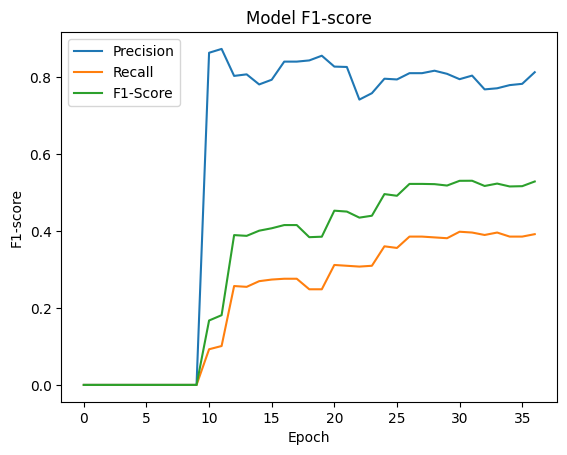

**---**

**Plotting the Confusion Matrix**

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


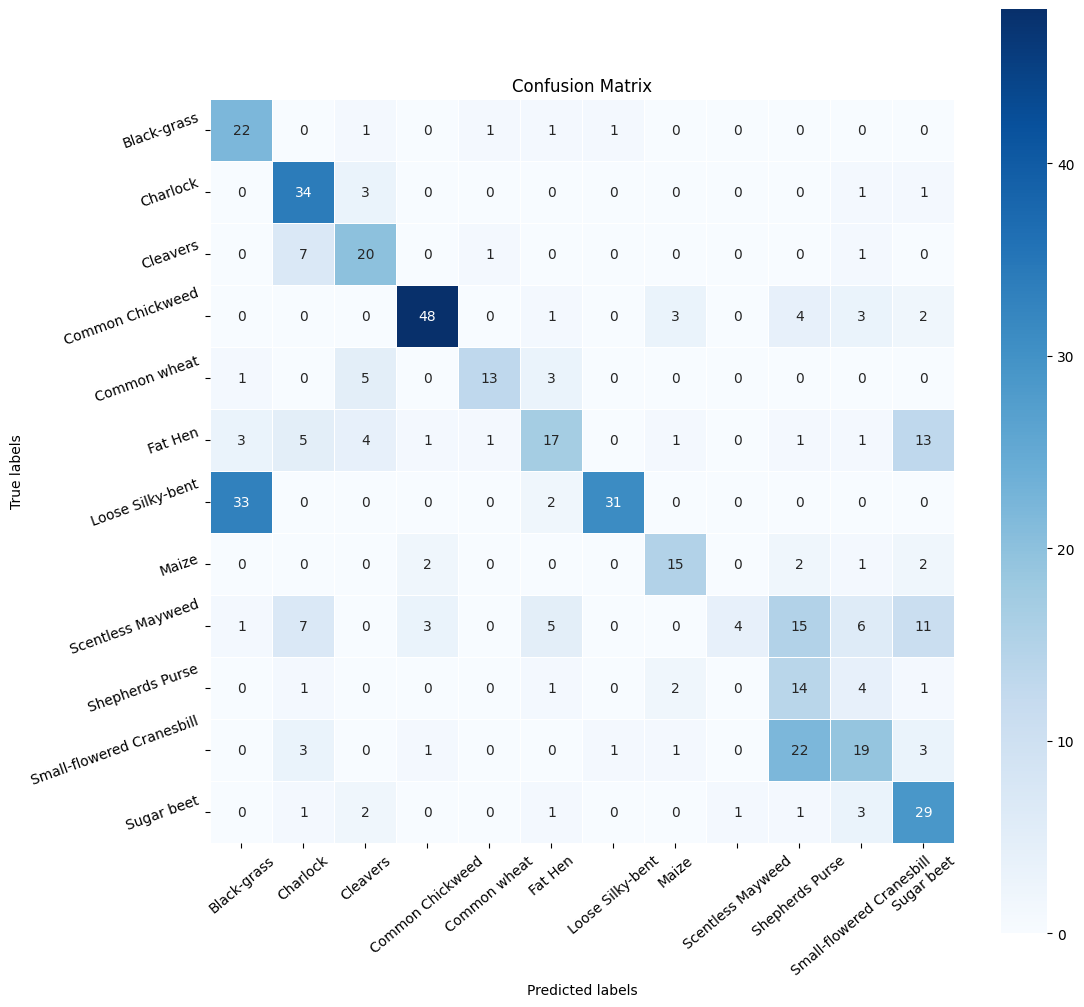

**Plotting the Confusion Matrix**

              precision    recall  f1-score   support

           0       0.37      0.85      0.51        26
           1       0.59      0.87      0.70        39
           2       0.57      0.69      0.62        29
           3       0.87      0.79      0.83        61
           4       0.81      0.59      0.68        22
           5       0.55      0.36      0.44        47
           6       0.94      0.47      0.63        66
           7       0.68      0.68      0.68        22
           8       0.80      0.08      0.14        52
           9       0.24      0.61      0.34        23
          10       0.49      0.38      0.43        50
          11       0.47      0.76      0.58        38

    accuracy                           0.56       475
   macro avg       0.61      0.59      0.55       475
weighted avg       0.66      0.56      0.55       475



In [35]:
cnn_plots('model_aug', model_aug, history_aug)

In [36]:
# dataframe with the results for the 2 models
df_model_results

,model_name,accuracy,precision,recall,f1
0,model1,0.808421,0.868235,0.776842,0.820000
1,model_aug,0.560000,0.781250,0.368421,0.500715


### 7.7. model_aug analysis

model_aug shows poor overall performance, likely struggling with class imbalance despite data augmentation and/or class weights.

**Key Observations:**
- **Accuracy (~56%) is low**, indicating the model isn’t learning meaningful patterns.  
- **Recall and F1-score are both weak**, meaning the model fails to correctly identify many samples, especially minority classes.  
- **The confusion matrix shows heavy misclassification**, with many classes mapped to a few dominant ones. Some classes are barely recognized.  

**Recommendations for further experimentation:**
1. **Reassess augmentation strategy**—ensure transformations don't distort key features.  
2. **Consider a different architecture or additional regularization** to improve generalization.  
3. **Analyze misclassified samples** to understand why the model struggles with certain classes.  

At this stage, prioritizing **recall and F1-score** is crucial to improving class representation.


## 8. Final Model

Out of 2 models built, `model1` will be selected as final model because it significantly outperforms in all key metrics. With 80% accuracy, 86% precision, 77% recall, and an F1-score of 82%. Model1 demonstrates strong predictive capability and a good balance between precision and recall. In contrast, model_aug performs poorly across the board, with an F1-score of only 50%, indicating that it fails to learn meaningful patterns. The extremely low recall (36%) in model_aug suggests it struggles to correctly identify most species, making it unreliable for real-world applications. Therefore, model1 is the clear choice for further refinement and deployment.

In [37]:
# selecting the final model
final_model = model1

#### 8.1. Visualizing the prediction

In [38]:
def visualize_predictions(image_indices, X_test, X_test_normalized, y_test_encoded, final_model, enc):
  """Visualizes predictions for a set of images.

  Args:
      image_indices: A list of image indices to visualize.
      X_test: The test dataset.
      X_test_normalized: The normalized test dataset.
      y_test_encoded: The encoded test labels.
      final_model: The trained model.
      enc: The label encoder.
  """
  for index in image_indices:
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[index])
    plt.show()

    predicted_label = enc.inverse_transform(final_model.predict(X_test_normalized[index].reshape(1, 64, 64, 3)))
    true_label = enc.inverse_transform(y_test_encoded)[index]

    print('Predicted Label:', predicted_label)
    print('True Label:', true_label)


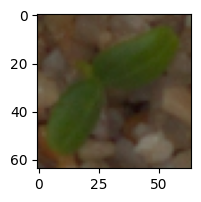

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
Predicted Label: ['Cleavers']
True Label: Cleavers


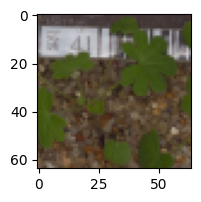

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill


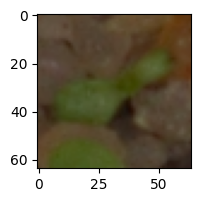

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label: ['Scentless Mayweed']
True Label: Scentless Mayweed


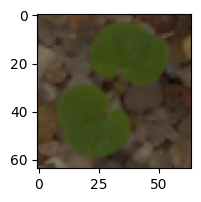

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill


In [39]:

# define image indices manually or randomly
# image_indices = [2, 33, 59, 36]
image_indices = random.sample(range(len(X_test)), 4)

# Call the function to visualize predictions
visualize_predictions(image_indices, X_test, X_test_normalized, y_test_encoded, final_model, enc)
# visualize_predictions(image_indices_random, X_test, X_test_normalized, y_test_encoded, final_model, enc)

## 9. Actionable Insights and Business Recommendations

**Insights from EDA**

1. **Class Imbalance is a Major Challenge**
- Certain species (e.g., **Loose Silky-bent, Common Chickweed**) dominate the dataset, while others (e.g., **Maize, Black-grass, Shepherd’s Purse**) are underrepresented.  
- This imbalance causes the model to favor majority classes, leading to **poor recall for minority classes**.

2. **Current Model Performance Highlights Areas for Improvement**
- **Model 1** performs reasonably well but still struggles with recall, meaning **some species are often misclassified**.  
- **Model 2 (`model_aug`) significantly underperforms**, indicating that **augmentation alone isn’t sufficient** to address class imbalance or improve generalization.  

3. **Confusion Matrix Indicates Heavy Misclassification**
- Certain species are **almost never correctly classified**, suggesting that their **unique characteristics are not well learned by the model**.  
- Commonly misclassified species may **share similar visual features**, making feature extraction a challenge.

---

**Recommendations**
1. **Optimize Model for Recall and F1-score**
- Given the class imbalance, **high accuracy alone is misleading**. Instead, optimizing for **recall ensures all species are correctly identified more often**.  
- **F1-score** will provide a better balance between **precision and recall**.  

2. **Apply Class Weighting in Loss Function**
- Assign **higher weights to underrepresented classes** to ensure the model gives them more attention.

3. **Refine Data Augmentation Strategy**
- Ensure **augmentations (e.g., rotations, zooms)** enhance generalization without **distorting class-specific characteristics**.  
- Consider **targeted augmentation** for minority classes to balance training data.

4. **Experiment with Model Architecture and Hyperparameters**
- Add **more convolutional layers** to improve feature extraction.  
- Introduce **dropout layers or batch normalization** to enhance generalization.  
- Tune **learning rate and batch size** to stabilize training.

5. **Analyze Misclassified Samples**
- Identify **common patterns in misclassification errors**.  
- Examine whether **similar-looking species** cause systematic confusion.

---

**Key Takeaways for the Business** <br>
1.   **AI can significantly improve agricultural efficiency**  
- Automating seedling classification will **reduce labor costs** and **improve decision-making** in crop management.

2.   **Current model needs further optimization**  
- While promising, the CNN requires **better handling of imbalanced data** to ensure reliable classification across all species.

3.   **Addressing class imbalance is critical for deployment**  
- Without improvements in **recall**, certain species **may still require manual identification**, limiting automation benefits.

4.   **Next Steps: model refinement and field testing**  
- Further improvements in **training strategy and architecture** will be necessary before real-world deployment.  
- **Field testing with real-world images** (beyond the dataset) will validate **model robustness**.
